# Data Science 03: Inženýrství příznaků (Feature Engineering)

In [1]:
# Instalace potřebných knihoven
#%pip instal pandas
#%pip install numpy

#%pip install scipy

#%pip install seaborn

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df‘
path='../../data/01_DataScience/exploration_timelaps.csv'
df = pd.read_csv(path)
df.head()

,id,x,y,z,time,delay,type_delay,total_time,time_binned,wo_delay,material,service,rotation,system
0,1,220,95,0,44,0,0,44,Long,True,False,False,False,False
1,2,220,252,0,35,0,0,35,Short,True,False,False,False,False
2,3,220,440,0,36,109,1,145,Short,False,True,False,False,False
3,4,220,690,0,36,0,0,36,Short,True,False,False,False,False
4,5,220,940,0,34,0,0,34,Short,True,False,False,False,False


### Analýza vzorců jednotlivých příznaků prostřednictvím grafické vizualizace

#### Výpočet korelace mezi proměnnými

In [4]:
df[['x', 'y', 'z', 'time', 'delay', 'type_delay', 'total_time']].corr()

,x,y,z,time,delay,type_delay,total_time
x,1.000000,-0.535873,0.120786,0.395179,0.025878,0.134066,0.119768
y,-0.535873,1.000000,-0.169543,-0.391292,-0.013002,-0.109445,-0.106539
z,0.120786,-0.169543,1.000000,-0.343239,-0.056292,0.023884,-0.136315
time,0.395179,-0.391292,-0.343239,1.000000,0.066204,0.035987,0.303759
delay,0.025878,-0.013002,-0.056292,0.066204,1.000000,0.591478,0.970769
type_delay,0.134066,-0.109445,0.023884,0.035987,0.591478,1.000000,0.573425
total_time,0.119768,-0.106539,-0.136315,0.303759,0.970769,0.573425,1.000000


(0.0, 59.8)

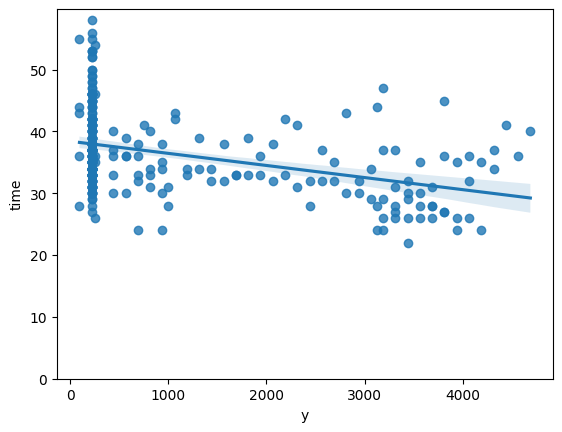

In [5]:
# 'x' jako potenciální prediktor 'time'
sns.regplot(x="y", y="time", data=df)
plt.ylim(0,)

### Analýza kategorických proměnných

<Axes: xlabel='type_delay', ylabel='total_time'>

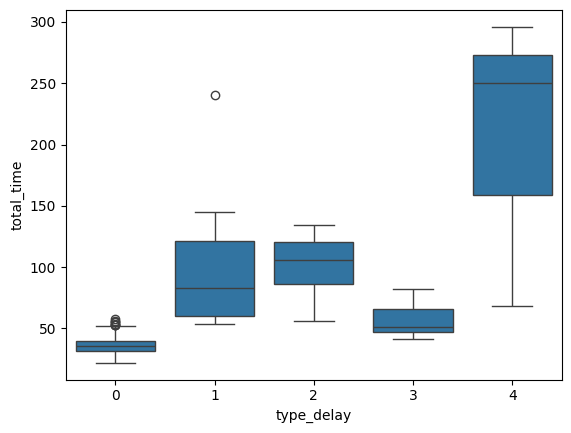

In [6]:
# Vztah mezi proměnnými ‚type_delay‘ a ‚total_time‘
sns.boxplot(x='type_delay', y="total_time", data=df)

### Deskriptivní statistická analýza dat

In [7]:
df.describe()

,id,x,y,z,time,delay,type_delay,total_time
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,139.881041,1297.936803,1052.033457,1001.858736,36.360595,5.553903,0.245353,41.914498
std,79.394072,1267.084840,1325.817766,707.763639,6.630443,26.319540,0.800668,27.564242
min,1.000000,95.000000,95.000000,0.000000,22.000000,0.000000,0.000000,22.000000
25%,72.000000,220.000000,220.000000,500.000000,32.000000,0.000000,0.000000,32.000000
50%,139.000000,690.000000,220.000000,1000.000000,36.000000,0.000000,0.000000,36.000000
75%,209.000000,2315.000000,1565.000000,1500.000000,40.000000,0.000000,0.000000,42.000000
max,277.000000,4002.000000,4690.000000,2250.000000,58.000000,260.000000,4.000000,296.000000


#### Výpočet četnosti jednotlivých hodnot

In [8]:
df['type_delay'].value_counts()

type_delay
0    242
3     13
1      7
2      4
4      3
Name: count, dtype: int64

In [9]:
df['type_delay'].value_counts().to_frame()

,count
type_delay,
0,242
3,13
1,7
2,4
4,3


### Seskupování dat

In [10]:
df['type_delay'].unique()

array([0, 1, 2, 4, 3])

In [11]:
df_group_one = df[['type_delay', 'total_time']]
df_group_one

,type_delay,total_time
0,0,44
1,0,35
2,1,145
3,0,36
4,0,34
...,...,...
264,0,37
265,0,39
266,3,82
267,0,44


In [12]:
# Výpočet průměrné hodnoty času pro jednotlivé kategorie dat
df_group_one = df_group_one.groupby(['type_delay'], as_index=False).mean()
df_group_one

,type_delay,total_time
0,0,36.359504
1,1,105.857143
2,2,100.500000
3,3,55.307692
4,4,204.666667


<span style='color:brown'>
<h4>Vztah mezi korelací a kauzalitou</h4>
<p><b>Korelace</b>: míra vzájemné závislosti mezi proměnnými.</p>
<p><b>Kauzalita</b>: vztah příčiny a následku mezi dvěma proměnnými.</p>
</span>

<span style='color:brown'>
<h4>Pearsonova korelace</h4>
<p>Pearsonův korelační koeficient měří lineární závislost mezi dvěma proměnnými X a Y.</p>
<p>Výsledný koeficient nabývá hodnot v intervalu od -1 do 1, kde:</p>
<ul>
    <li><b>1</b>: Dokonalá kladná lineární korelace.</li>
    <li><b>0</b>: Žádná lineární korelace, proměnné se pravděpodobně lineárně neovlivňují.</li>
    <li><b>-1</b>: Dokonalá záporná lineární korelace.</li>
</ul>
</span>

In [13]:
corr = df[['x', 'y', 'z', 'time', 'delay', 'type_delay', 'total_time']].corr()

<Axes: >

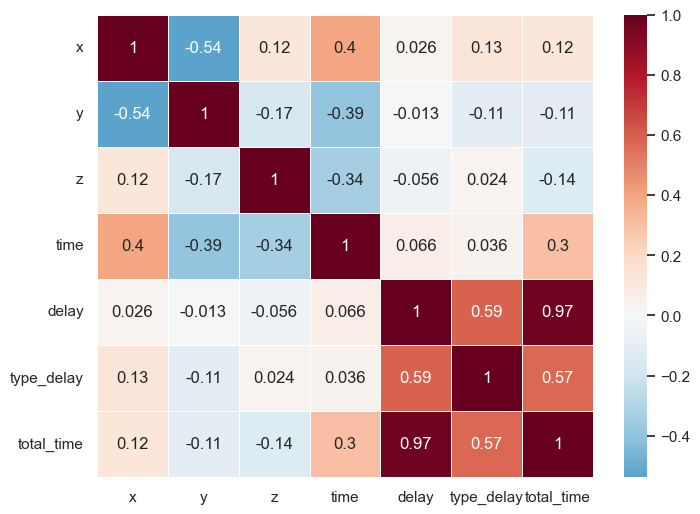

In [14]:
# Teplotní mapa (heatmapa)
sns.set_theme(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu_r",
    center=0,
    linewidths=0.5
)

<span style='color:brown'>
<b>P-value</b>
<p>P-hodnota (P-value) představuje pravděpodobnost, že korelace mezi dvěma proměnnými je statisticky významná. Obvykle se volí hladina významnosti 0,05, což znamená, že s 95% jistotou považujeme korelaci mezi proměnnými za statisticky významnou.</p>

<p>Podle běžně používané konvence platí, že pokud:</p>
<ul>
    <li>p-hodnota je < 0,001: existuje silný důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je < 0,05: existuje středně silný důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je < 0,1: existuje slabý důkaz, že korelace je statisticky významná.</li>
    <li>p-hodnota je > 0,1: neexistuje důkaz o statistické významnosti korelace.</li>
</ul>
</span>

#### 'dest_to_end' vs. 'total_time'

In [15]:
# Výpočet Pearsonova korelačního koeficientu a odpovídající p-hodnoty mezi proměnnými ‚x‘ a ‚time‘
pearson_coef, p_value = stats.pearsonr(df['x'], df['time'])
print("Pearsonov korelační koeficient = ", pearson_coef, ".  P-value =", p_value)

Pearsonov korelační koeficient =  0.3951785339509214 .  P-value = 1.7316685425319944e-11


Protože p-hodnota je < 0,001, korelace mezi proměnnými je statisticky významná a lineární vztah je středně silný

### Analýza rozptylu (ANOVA) pro porovnání skupinových průměrů

<span style='color:brown'>
<p><b>Analýza rozptylu (ANOVA)</b> je statistická metoda používaná k ověření, zda existují statisticky významné rozdíly mezi průměry dvou nebo více skupin. ANOVA vrací dva základní parametry:</p>

<p><b>F-statistika (F-test)</b>: ANOVA předpokládá, že průměry všech skupin jsou stejné, a následně vyhodnocuje, jak moc se skutečné průměry od tohoto předpokladu odchylují. Tato odchylka je vyjádřena hodnotou F-statistiky. Vyšší hodnota znamená větší rozdíl mezi skupinovými průměry.</p>

<p><b>P-hodnota</b>: P-hodnota udává, jak statisticky významná je vypočtená hodnota F-statistiky.</p>

<p>Pokud je analyzovaná proměnná silně korelována s vysvětlovanou proměnnou, očekáváme, že ANOVA vrátí vysokou hodnotu F-statistiky a nízkou p-hodnotu.</p>
</span>

In [16]:
# provedeme seskupení dat podle jednotlivých kategorií
grouped_test = df[['type_delay', 'total_time']].groupby('type_delay')
grouped_test.head()

,type_delay,total_time
0,0,44
1,0,35
2,1,145
3,0,36
4,0,34
5,2,96
6,0,34
15,1,240
26,4,250
30,3,66


In [17]:
grouped_test.get_group(1)['total_time']

2      145
15     240
73      63
152     83
160     58
181     98
257     54
Name: total_time, dtype: int64

#### BASIC a HALF

In [18]:
f_val, p_val = stats.f_oneway(grouped_test.get_group(1)['total_time'], grouped_test.get_group(2)['total_time'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.021705864420776055 , P = 0.8861199353688878


Výsledky analýzy ANOVA pro kategorie `material` a `service` vykazují p-hodnotu vyšší než 0,1, což znamená, že F-statistika není statisticky významná. Nelze tedy zamítnout nulovou hypotézu o shodě průměrů obou skupin a nelze potvrdit statisticky významný rozdíl mezi nimi.

### Závěr: Identifikace významných proměnných

<p>Na základě provedené analýzy byly identifikovány následující významné proměnné:</p>

<ul>
    <li>total_time</li>
    <li>time</li>
    <li>x</li>
    <li>y</li>
    <li>z</li>
    <li>type_delay</li>
</ul>

### Export datové sady do formátu CSV

In [19]:
df_ready = df[['id', 'type_delay', 'x', 'y', 'z', 'time', 'total_time']]

In [20]:
df_ready.to_csv('../../data/01_DataScience/ready_timelaps.csv', index=False)

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-21 | 1.1 | Vjačeslav Usmanov| added DS_03_Features.ipynb |
| 2026-02-12 | 1.2 | Vjačeslav Usmanov| changed DS_03_Features.ipynb |